In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("merged_data_IPL.csv")

C:\Users\karth\AppData\Local\Temp\ipykernel_6288\3751309659.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("merged_data_IPL.csv")


In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen


In [4]:
df.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,id,result_margin,target_runs,target_overs
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,2.609200e+05,256796.000000,260611.000000,260611.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632,9.070665e+05,17.279451,167.290406,19.846742
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184,3.679913e+05,21.600307,32.165944,1.224266
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.483340e+05,6.000000,148.000000,20.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,9.809670e+05,8.000000,167.000000,20.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,1.254066e+06,20.000000,188.000000,20.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000,1.426312e+06,146.000000,288.000000,20.000000


In [5]:
df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
id                       0
season                   0
city                 12397
date                     0
match_type               0
player_of_match        490
venue                    0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 490
result                   0
result_margin         4124
target_runs            309
target_overs           309
super_over               0
umpire1                  0
umpire2                  0
dtype: int64

In [7]:
# Handle missing values
df['city'] = df['city'].fillna('Unknown')
df['result_margin'] = df['result_margin'].fillna(0)
df['target_runs'] = df['target_runs'].fillna(0)
df['target_overs'] = df['target_overs'].fillna(0)

In [8]:
# Drop columns with excessive missing values
columns_to_drop = ['extras_type', 'player_dismissed', 'dismissal_kind', 'fielder','umpire1','umpire2']
df = df.drop(columns=columns_to_drop)

In [9]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,...,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,...,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,...,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,...,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N


In [10]:
# Convert data types
df['season'] = pd.to_numeric(df['season'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [11]:
df.isnull().sum()

match_id               0
inning                 0
batting_team           0
bowling_team           0
over                   0
ball                   0
batter                 0
bowler                 0
non_striker            0
batsman_runs           0
extra_runs             0
total_runs             0
is_wicket              0
id                     0
season             42546
city                   0
date                   0
match_type             0
player_of_match      490
venue                  0
team1                  0
team2                  0
toss_winner            0
toss_decision          0
winner               490
result                 0
result_margin          0
target_runs            0
target_overs           0
super_over             0
dtype: int64

In [12]:
# Define the ranges of rows and the corresponding year to fill in the 'season' column
fill_ranges = {
    '2008': (2, 13490),
    '2010': (27097, 41594),
    '2020': (179060, 193618)
}

# Fill the season column with the appropriate values for the specified ranges
for year, (start, end) in fill_ranges.items():
    df.loc[start:end, 'season'] = int(year)

# Convert the 'season' column to integers to ensure consistent type
# Replace NaN values with a suitable integer (e.g., 0 or -1) before conversion
df['season'] = df['season'].fillna(-1).astype(int)

# Verify by checking the unique values
unique_seasons = df['season'].unique()
print("Unique values in 'season' after filling:", unique_seasons)

Unique values in 'season' after filling: [  -1 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023 2024]


In [13]:
# Fill missing values in the 'winner' and 'player_of_match' columns for no-result matches
df.loc[df['winner'].isna(), 'winner'] = 'No Result'
df.loc[df['player_of_match'].isna(), 'player_of_match'] = 'No Award'

In [14]:
df.isnull().sum()

match_id           0
inning             0
batting_team       0
bowling_team       0
over               0
ball               0
batter             0
bowler             0
non_striker        0
batsman_runs       0
extra_runs         0
total_runs         0
is_wicket          0
id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
dtype: int64

In [15]:
cleaned_file_path = 'cleaned_merged_data_IPL.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")

Cleaned dataset saved to: cleaned_merged_data_IPL.csv


# Exploratory Data Analysis

Importing libraries

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Loading dataset

In [17]:
file_path = 'cleaned_merged_data_IPL.csv'
data = pd.read_csv(file_path)

overview of data

In [18]:
print('Dataset_shape:',data.shape)
print('\nColumn Info:')
data.info()
print('\nDescriptive Statistics:')
data.describe()

Dataset_shape: (260920, 30)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   match_id         260920 non-null  int64  
 1   inning           260920 non-null  int64  
 2   batting_team     260920 non-null  object 
 3   bowling_team     260920 non-null  object 
 4   over             260920 non-null  int64  
 5   ball             260920 non-null  int64  
 6   batter           260920 non-null  object 
 7   bowler           260920 non-null  object 
 8   non_striker      260920 non-null  object 
 9   batsman_runs     260920 non-null  int64  
 10  extra_runs       260920 non-null  int64  
 11  total_runs       260920 non-null  int64  
 12  is_wicket        260920 non-null  int64  
 13  id               260920 non-null  int64  
 14  season           260920 non-null  int64  
 15  city             260920 non-null  object 
 

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,id,season,result_margin,target_runs,target_overs
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632,9.070665e+05,2016.114679,17.006339,167.092289,19.823239
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184,3.679913e+05,10.866611,21.537025,32.657719,1.401063
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.359820e+05,-1.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.483340e+05,2012.000000,5.000000,148.000000,20.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,9.809670e+05,2016.000000,8.000000,167.000000,20.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,1.254066e+06,2021.000000,20.000000,188.000000,20.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000,1.426312e+06,2024.000000,146.000000,288.000000,20.000000


checking missing values

In [19]:
print("\n Missing Values:")
print(data.isnull().sum())


 Missing Values:
match_id           0
inning             0
batting_team       0
bowling_team       0
over               0
ball               0
batter             0
bowler             0
non_striker        0
batsman_runs       0
extra_runs         0
total_runs         0
is_wicket          0
id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
dtype: int64


In [20]:
data

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,...,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,...,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,...,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,...,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N


Top 10 players with Player of the Match awards

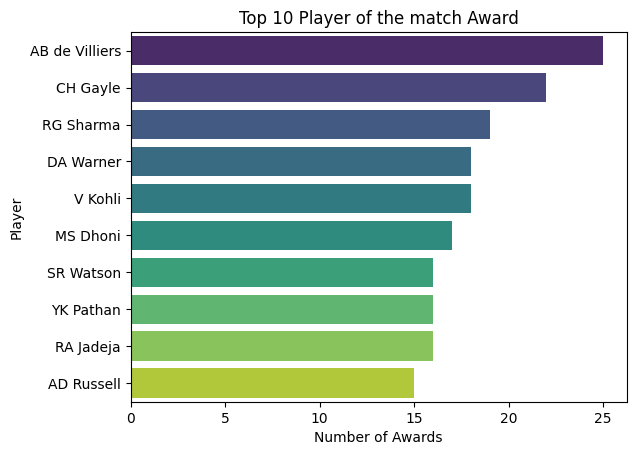

In [21]:
# Group the data by match ID and select the unique 'player_of_match' for each match
unique_player_awards = data.groupby('match_id')['player_of_match'].unique()

# Flatten the list of unique players across all matches
all_unique_players = [player for sublist in unique_player_awards for player in sublist]

# Count the occurrences of each player across matches (now ensuring uniqueness per match)
unique_player_counts = pd.Series(all_unique_players).value_counts()

# Visualize the top 10 players
import matplotlib.pyplot as plt
import seaborn as sns

top_10_players = unique_player_counts.head(10)
sns.barplot(x=top_10_players.values, y=top_10_players.index, palette="viridis")
plt.title('Top 10 Player of the match Award')
plt.xlabel('Number of Awards')
plt.ylabel('Player')
plt.show()


Winning teams analysis

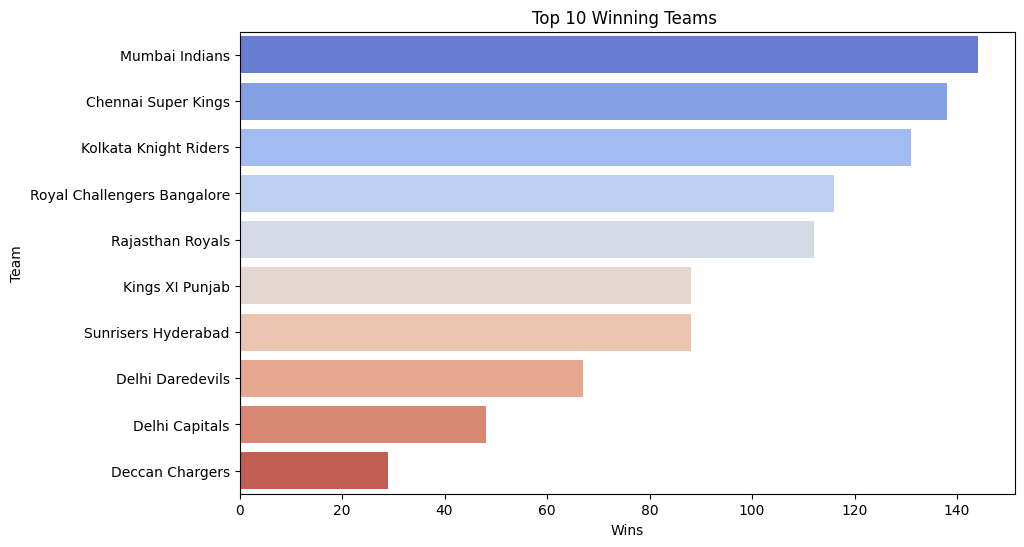

In [23]:
# Group data by match ID and get unique winners for each match
unique_match_winners = data.groupby('match_id')['winner'].first()

# Count the unique match wins for each team
unique_winning_teams = unique_match_winners.value_counts().head(10)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_winning_teams.values, y=unique_winning_teams.index, palette="coolwarm")
plt.title('Top 10 Winning Teams ')
plt.xlabel('Wins')
plt.ylabel('Team')
plt.show()

Toss decision analysis

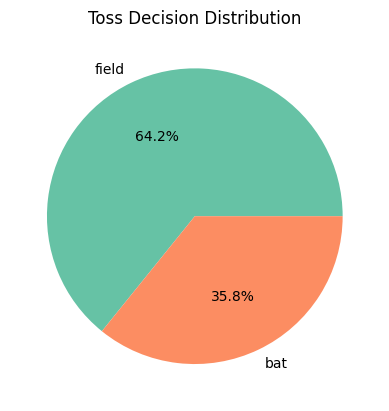

In [24]:
plt.pie(data['toss_decision'].value_counts(), labels=data['toss_decision'].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title('Toss Decision Distribution')
plt.show()


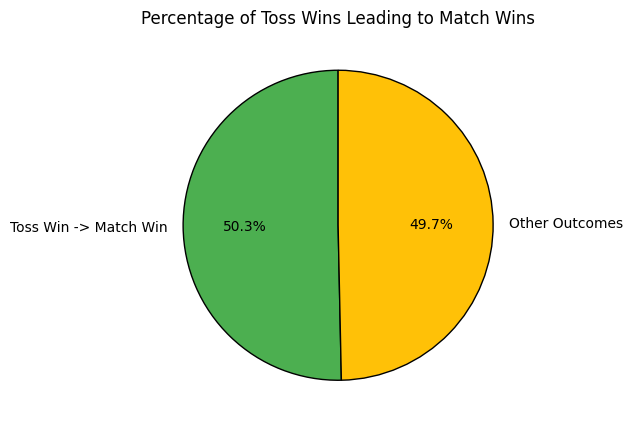

In [25]:
# Calculate total matches where teams won the toss
total_toss_wins = len(data[data['toss_winner'] == data['winner']])

# Calculate total matches
total_matches = len(data)

# Calculate percentage of toss wins leading to match wins
percentage_toss_win_to_match_win = (total_toss_wins / total_matches) * 100

# Prepare data for the pie chart
labels = ['Toss Win -> Match Win', 'Other Outcomes']
sizes = [percentage_toss_win_to_match_win, 100 - percentage_toss_win_to_match_win]
colors = ['#4CAF50', '#FFC107']

# Plot the pie chart
plt.figure(figsize=(5, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Percentage of Toss Wins Leading to Match Wins')
plt.show()


<Figure size 1200x1000 with 0 Axes>

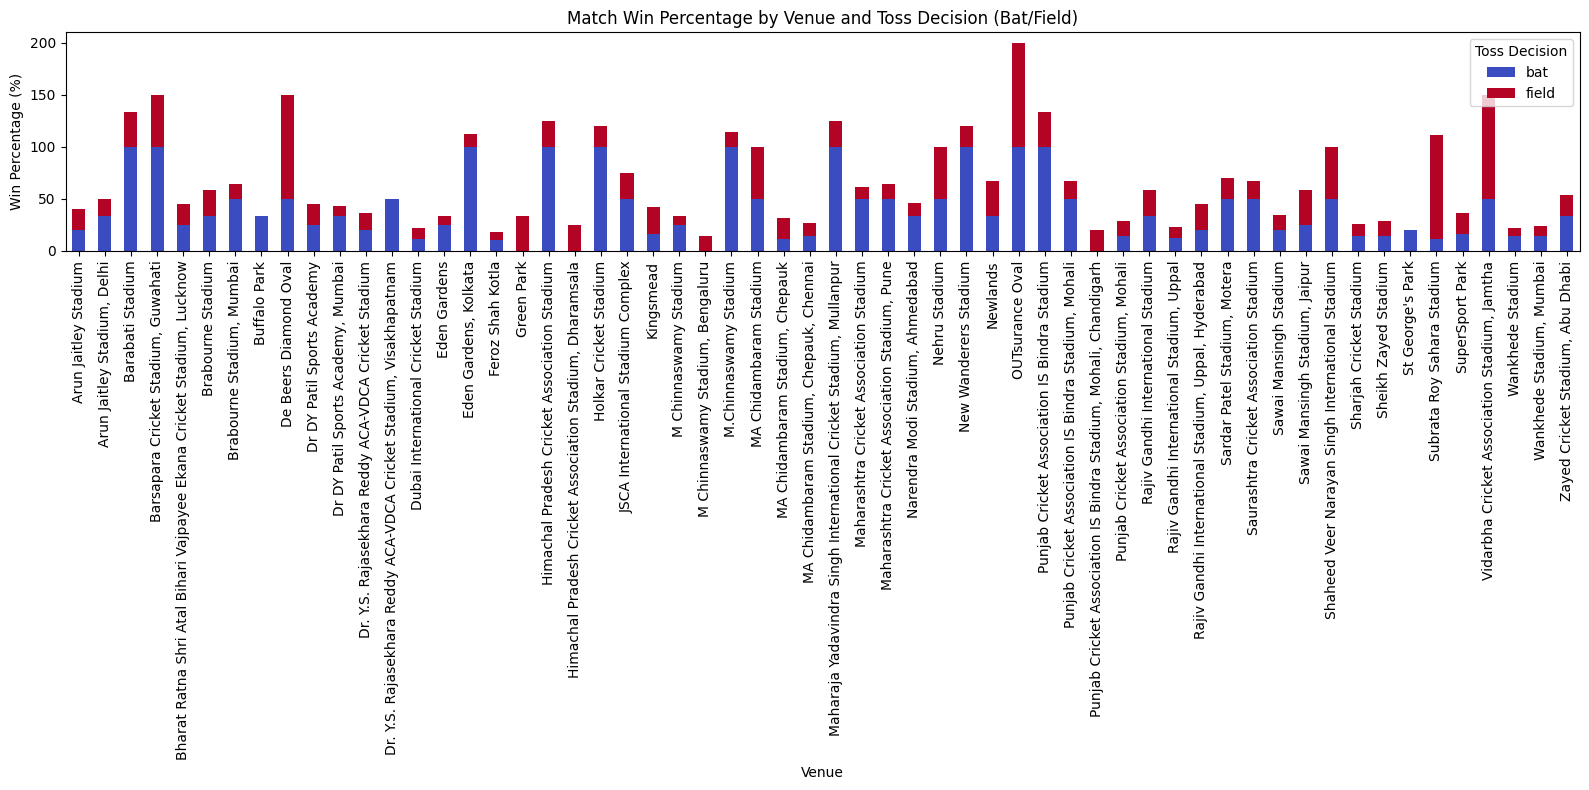

In [26]:
# Calculate match win percentage based on venue and decision to bat or field
venue_decision_wins = data.groupby(['venue', 'toss_decision', 'winner']).size().reset_index(name='count')

# Normalize counts to percentages within each venue and decision (bat/field)
venue_total_matches = data.groupby(['venue', 'toss_decision']).size().reset_index(name='total_matches')
merged_data = pd.merge(venue_decision_wins, venue_total_matches, on=['venue', 'toss_decision'])
merged_data['win_percentage'] = (merged_data['count'] / merged_data['total_matches']) * 100

# Pivot data for visualization
pivot_table = merged_data.pivot_table(index='venue', columns='toss_decision', values='win_percentage', aggfunc='mean')

# Plot the data
plt.figure(figsize=(12, 10))
pivot_table.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='coolwarm')
plt.title('Match Win Percentage by Venue and Toss Decision (Bat/Field)')
plt.xlabel('Venue')
plt.ylabel('Win Percentage (%)')
plt.legend(title='Toss Decision', loc='upper right')
plt.tight_layout()
plt.show()


Result margin analysis

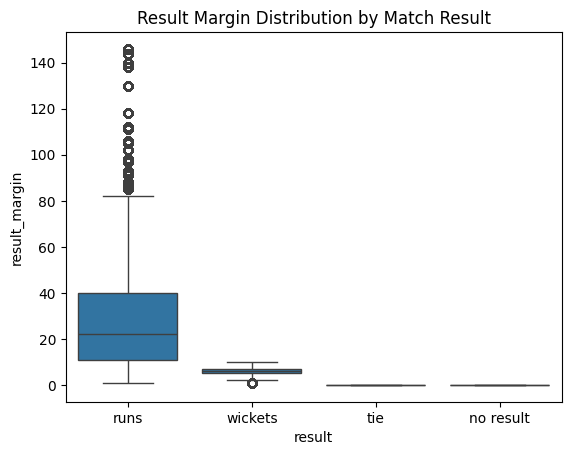

In [27]:
sns.boxplot(data=data, x='result', y='result_margin')
plt.title('Result Margin Distribution by Match Result')
plt.show()

Runs scored per over

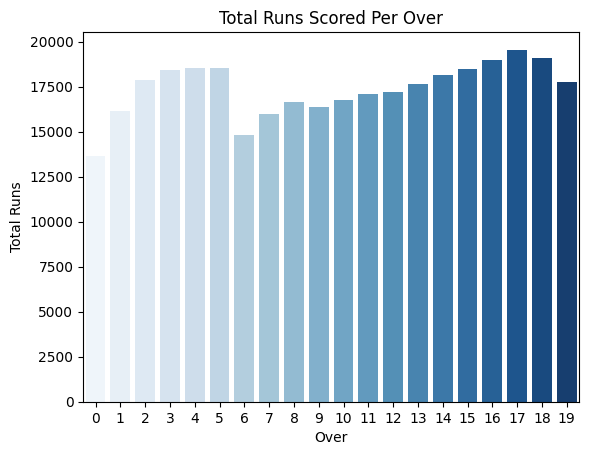

In [28]:
runs_per_over = data.groupby(['over'])['total_runs'].sum()
sns.barplot(x=runs_per_over.index, y=runs_per_over.values, palette="Blues")
plt.title('Total Runs Scored Per Over')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.show()

Batting team performance

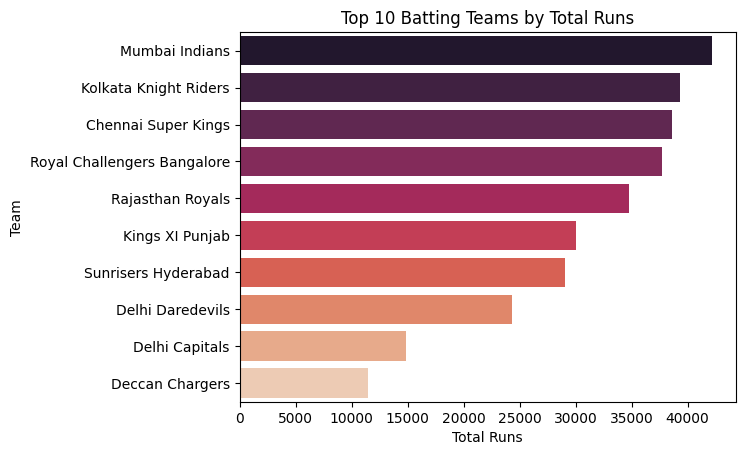

In [29]:
batting_performance = data.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=batting_performance.values, y=batting_performance.index, palette="rocket")
plt.title('Top 10 Batting Teams by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Team')
plt.show()

Bowler performance

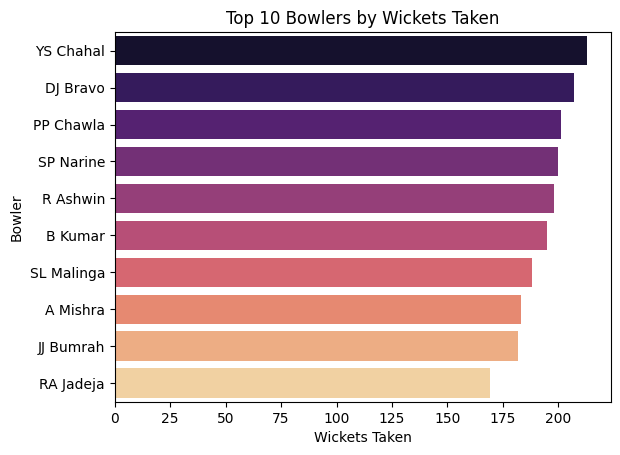

In [30]:
bowler_performance = data.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=bowler_performance.values, y=bowler_performance.index, palette="magma")
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.show()

Visualize match outcomes (Win/Loss) across different years

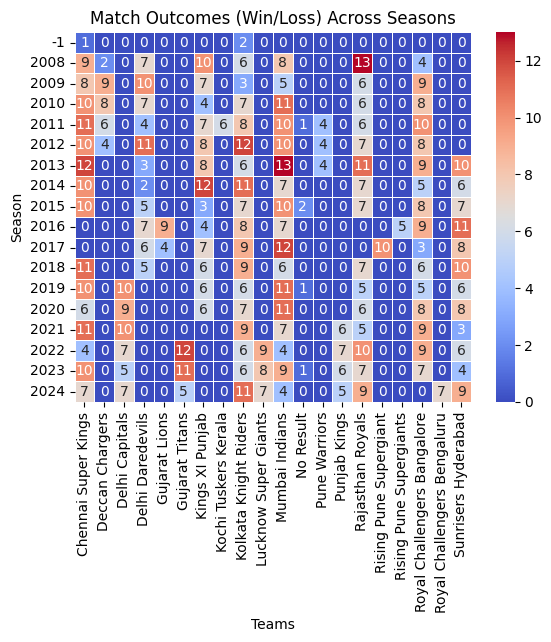

In [31]:
match_outcomes = data.groupby(['season', 'winner'])['match_id'].nunique().unstack().fillna(0)
sns.heatmap(match_outcomes, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title('Match Outcomes (Win/Loss) Across Seasons')
plt.xlabel('Teams')
plt.ylabel('Season')
plt.show()

Analyze team performance based on historical data and seasonal trends


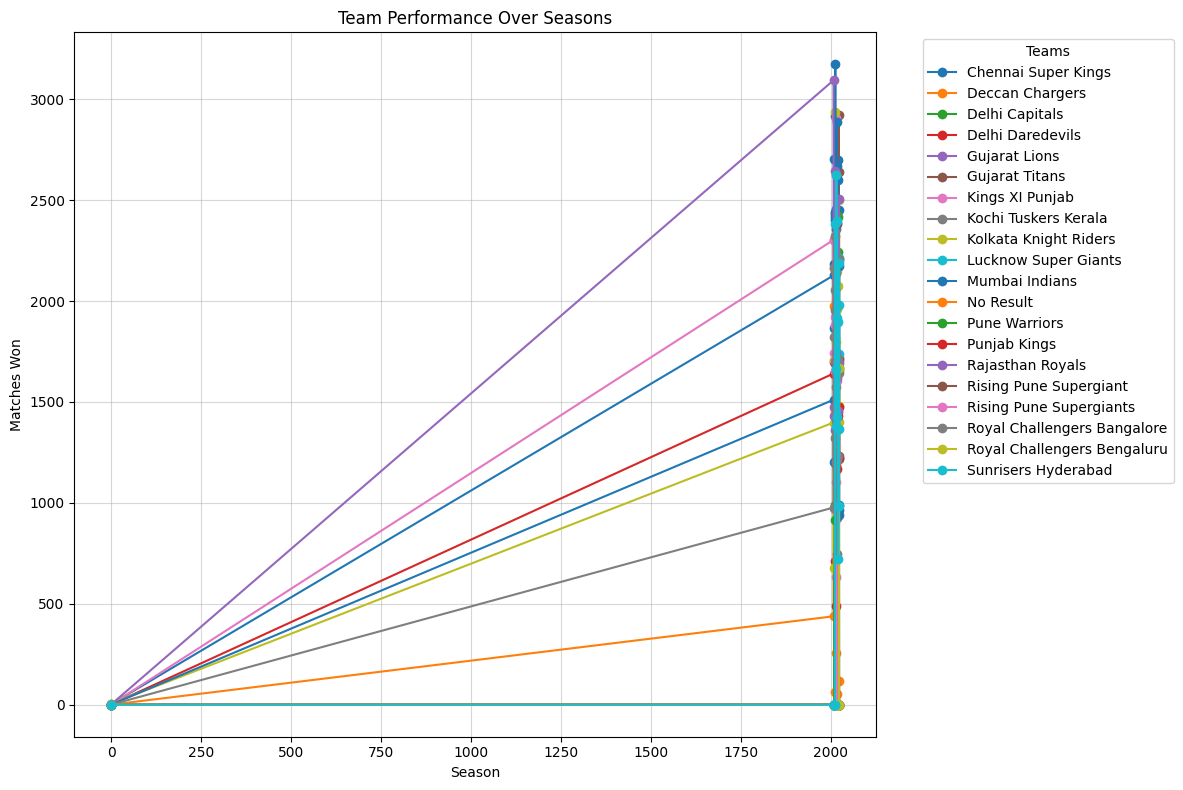

In [32]:
# Prepare data for a line chart
team_performance_pivot = data.groupby(['season', 'winner'])['match_id'].count().unstack(fill_value=0)

# Plot the line chart
plt.figure(figsize=(12, 8))
for team in team_performance_pivot.columns:
    plt.plot(team_performance_pivot.index, team_performance_pivot[team], marker='o', label=team)

plt.title('Team Performance Over Seasons')
plt.xlabel('Season')
plt.ylabel('Matches Won')
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

Player Performance

Top players by total runs

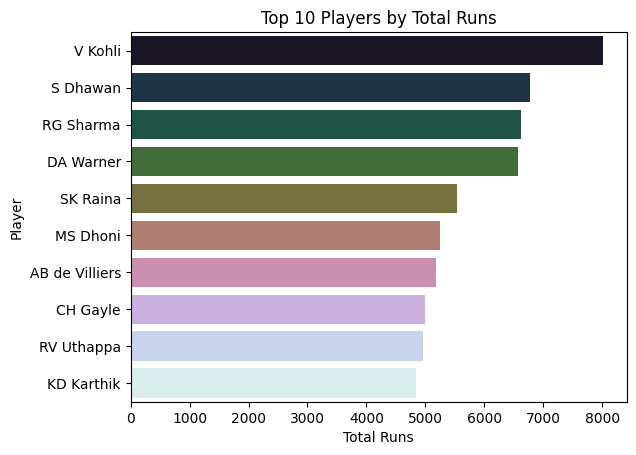

In [33]:
player_runs = data.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=player_runs.values, y=player_runs.index, palette="cubehelix")
plt.title('Top 10 Players by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Player')
plt.show()

Top players by wickets taken

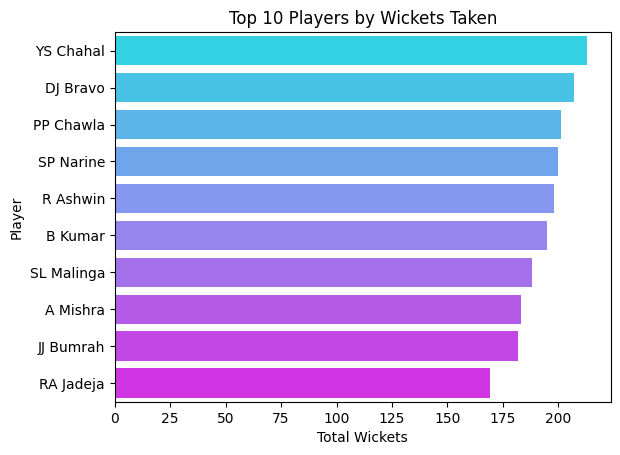

In [34]:
player_wickets = data.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=player_wickets.values, y=player_wickets.index, palette="cool")
plt.title('Top 10 Players by Wickets Taken')
plt.xlabel('Total Wickets')
plt.ylabel('Player')
plt.show()


Player strike rates

In [35]:
# Filter out wides (since they do not count as balls faced)
data_filtered = data[data['extra_runs'] != 'wide']

# Calculate balls faced by each batter
balls_faced = data_filtered.groupby('batter').size()

# Map the balls faced to the original dataset
data['ball_faced'] = data['batter'].map(balls_faced)

# Calculate total runs scored by each player
player_runs = data.groupby('batter')['batsman_runs'].sum()


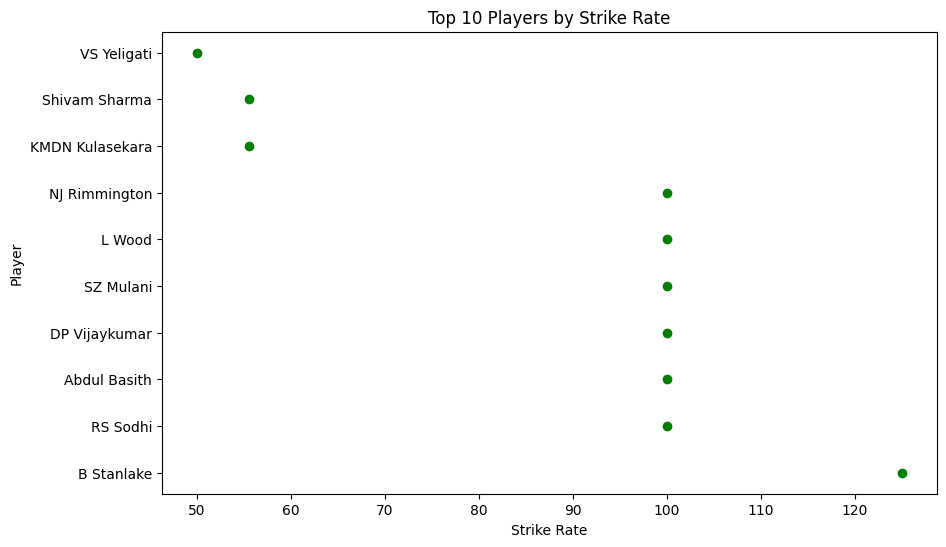

In [36]:
player_balls = data.groupby('batter')['ball_faced'].sum()
player_strike_rate = (player_runs / player_balls * 100).sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.scatter(player_strike_rate.values, player_strike_rate.index, color="green")
plt.title('Top 10 Players by Strike Rate')
plt.xlabel('Strike Rate')
plt.ylabel('Player')
plt.show()

Team Comparison

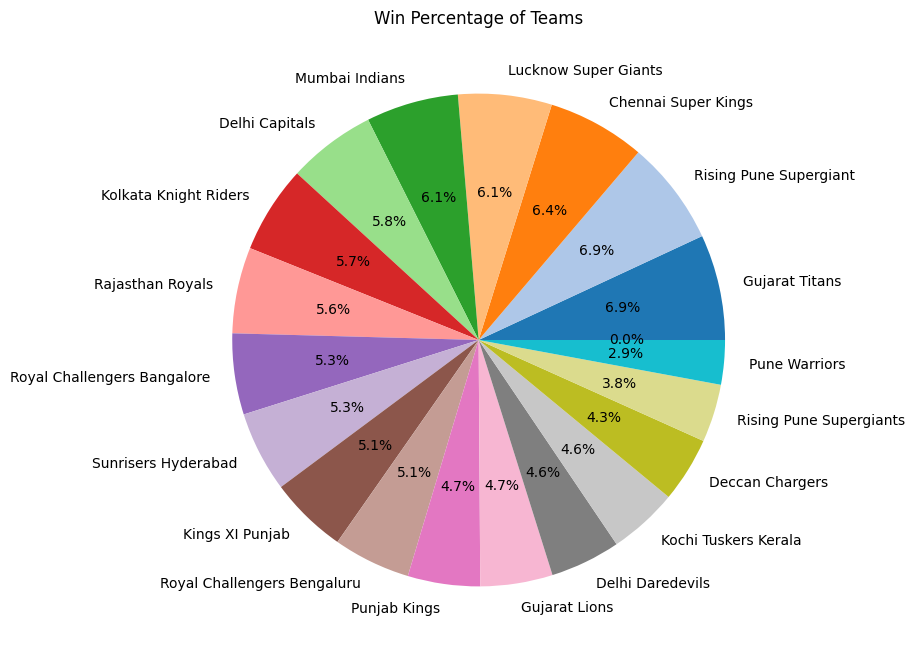

In [37]:
# Win percentage for each team
team_wins = data['winner'].value_counts()
total_matches = data['batting_team'].value_counts() + data['bowling_team'].value_counts()
win_percentage = (team_wins / total_matches * 100).sort_values(ascending=False)

# Pie chart for win percentage
win_percentage.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colormap='tab20', ylabel='')
plt.title('Win Percentage of Teams')
plt.show()


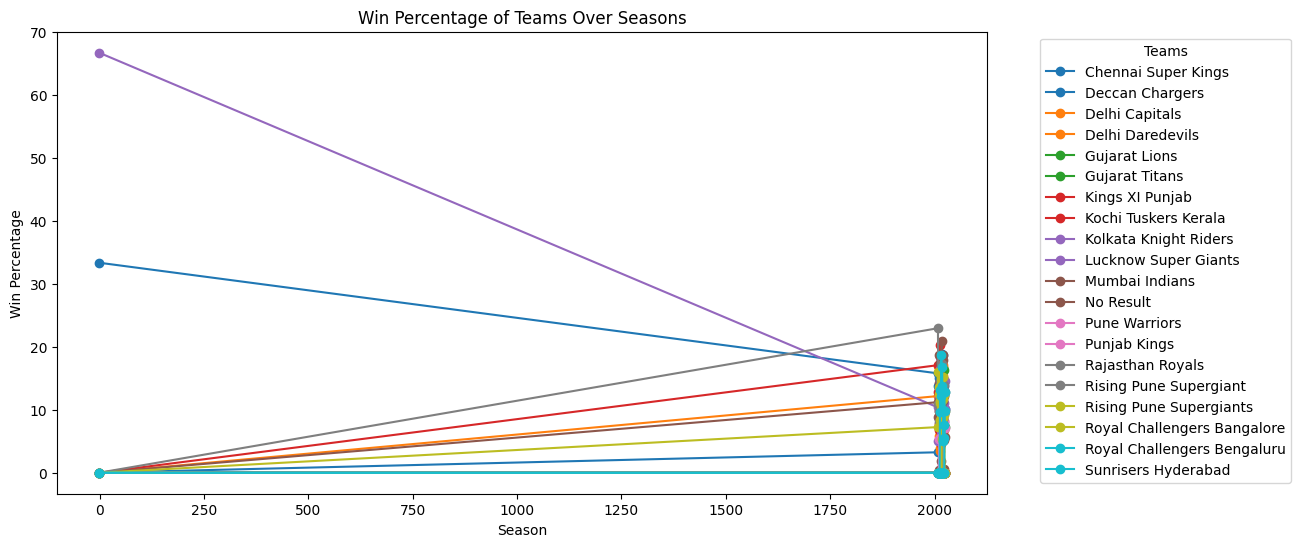

In [38]:
# Line chart for win percentage over seasons
win_percentage_season = data.groupby(['season', 'winner'])['match_id'].count().unstack().fillna(0)
win_percentage_season = (win_percentage_season.div(win_percentage_season.sum(axis=1), axis=0) * 100)
win_percentage_season.plot(kind='line', figsize=(12, 6), marker='o', colormap='tab10')
plt.title('Win Percentage of Teams Over Seasons')
plt.xlabel('Season')
plt.ylabel('Win Percentage')
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()